In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!unzip gdrive/My\ Drive/data/DBP_wiki_data.csv.zip > /dev/null
"""
Dataset yang digunakan berasal dari laman berikut:
https://www.kaggle.com/danofer/dbpedia-classes?select=DBP_wiki_data.csv
"""

replace DBP_wiki_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [5]:
df = pd.read_csv('DBP_wiki_data.csv')

In [6]:
df.head()

,text,l1,l2,l3,wiki_name,word_count
0,The 1994 Mindoro earthquake occurred on Novemb...,Event,NaturalEvent,Earthquake,1994_Mindoro_earthquake,59
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event,NaturalEvent,Earthquake,1917_Bali_earthquake,68
2,The 1941 Colima earthquake occurred on April 1...,Event,NaturalEvent,Earthquake,1941_Colima_earthquake,194
3,The 1983 Coalinga earthquake occurred on May 2...,Event,NaturalEvent,Earthquake,1983_Coalinga_earthquake,98
4,The 2013 Bushehr earthquake occurred with a mo...,Event,NaturalEvent,Earthquake,2013_Bushehr_earthquake,61


In [7]:
df = df.drop(columns=['wiki_name','word_count','l2','l3'])

In [8]:
df.head()

,text,l1
0,The 1994 Mindoro earthquake occurred on Novemb...,Event
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event
2,The 1941 Colima earthquake occurred on April 1...,Event
3,The 1983 Coalinga earthquake occurred on May 2...,Event
4,The 2013 Bushehr earthquake occurred with a mo...,Event


In [9]:
category = pd.get_dummies(df.l1)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='l1')
df_baru

,text,Agent,Device,Event,Place,Species,SportsSeason,TopicalConcept,UnitOfWork,Work
0,The 1994 Mindoro earthquake occurred on Novemb...,0,0,1,0,0,0,0,0,0
1,The 1917 Bali earthquake occurred at 06:50 loc...,0,0,1,0,0,0,0,0,0
2,The 1941 Colima earthquake occurred on April 1...,0,0,1,0,0,0,0,0,0
3,The 1983 Coalinga earthquake occurred on May 2...,0,0,1,0,0,0,0,0,0
4,The 2013 Bushehr earthquake occurred with a mo...,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
342776,WCSH is the NBC-affiliated television station ...,1,0,0,0,0,0,0,0,0
342777,Al Jazeera America (AJAM) was an American basi...,1,0,0,0,0,0,0,0,0
342778,"CJOH-DT, VHF channel 13, is a CTV owned-and-op...",1,0,0,0,0,0,0,0,0
342779,NTTV (North Texas Television) is a student tel...,1,0,0,0,0,0,0,0,0


In [10]:
text_description = df_baru['text'].values
label = df_baru[['Agent', 'Device', 'Event', 'Place', 'Species','SportsSeason','TopicalConcept','UnitOfWork','Work']].values

In [11]:
text_train, text_test, label_train, label_test = train_test_split(text_description, label, test_size=0.2)

In [12]:
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=300),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
num_epochs = 30
history = model.fit(padded_latih, label_train, epochs=num_epochs,
                    batch_size=128,validation_data=(padded_test, label_test), 
                    verbose=2,callbacks=[callbacks])

Epoch 1/30
2143/2143 - 223s - loss: 0.6100 - accuracy: 0.7970 - val_loss: 0.3900 - val_accuracy: 0.8663
Epoch 2/30
2143/2143 - 219s - loss: 0.2842 - accuracy: 0.9197 - val_loss: 0.1237 - val_accuracy: 0.9665

Akurasi telah mencapai >90%!


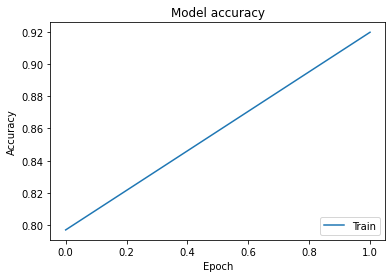

In [15]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

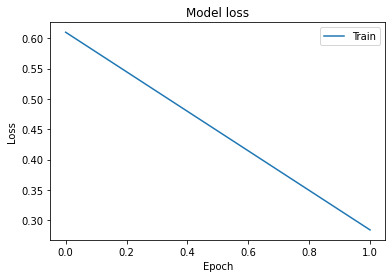

In [16]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()